In [1]:
#自动重载
%load_ext autoreload
import os
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2
from utils import mask2yolo,make_pic
from tqdm import tqdm
mainpath = "./datasets/"
bg_path = "bg/"
fg_path = "fg_2/"
masks_path = "masks/"
fgs = os.listdir(mainpath+fg_path)
bgs = os.listdir(mainpath+bg_path)
masks = os.listdir(mainpath+masks_path)

In [2]:
test_fg = Image.open(mainpath+fg_path+fgs[1])
test_bg = Image.open(mainpath+bg_path+bgs[2])
test_mask = Image.open(mainpath+masks_path+masks[1])
mixed_pic,mixed_mask = make_pic(test_fg,test_bg,test_mask)

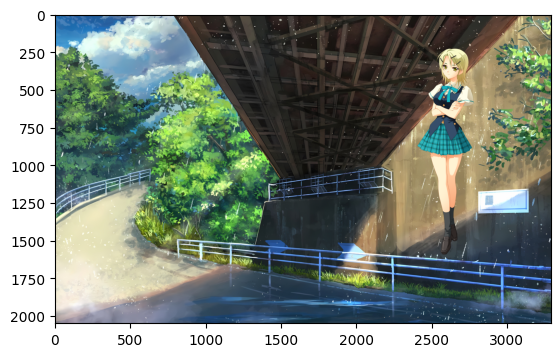

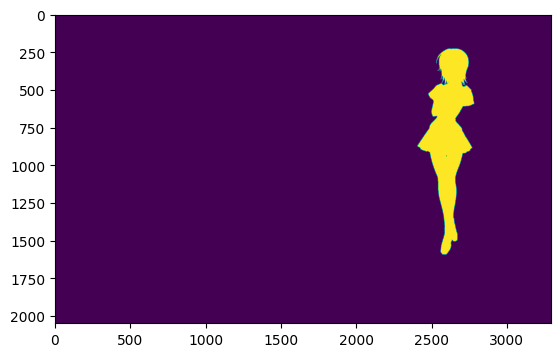

In [3]:
# 打印出来看看
plt.imshow(mixed_pic)
plt.show()
mixed_mask = np.array(mixed_mask)
plt.imshow(mixed_mask)
plt.show()

In [4]:
yolo = mask2yolo(mixed_mask,show=False)


In [5]:
# 为每个fg都生成一个yolo的
# 生成的yolo格式的mask保存在./datasets/masks_yolo/下
# 生成的叠加后的图片保存在./datasets/mixed_pic/下
# 改成tqdm的形式，可以看到进度条
if not os.path.exists(mainpath+"masks_yolo/"):
    os.mkdir(mainpath+"masks_yolo/")
if not os.path.exists(mainpath+"mixed_pic/"):
    os.mkdir(mainpath+"mixed_pic/")
if not  os.path.exists(mainpath+"mixed_mask/"):
    os.mkdir(mainpath+"mixed_mask/")
for n in tqdm(range(len(fgs)), desc='Processing images'):
    fg = fgs[n]
    bg = bgs[np.random.randint(0,len(bgs))]
    mask = masks[n]
    fg_pic = Image.open(mainpath+fg_path+fg)
    bg_pic = Image.open(mainpath+bg_path+bg)
    mask_pic = Image.open(mainpath+masks_path+mask)
    mixed_pic, mixed_mask = make_pic(fg_pic, bg_pic, mask_pic)
    mixed_pic.save(mainpath+"mixed_pic/"+fg[:-4]+"_"+bg[:-4]+".jpg")
    mixed_mask.save(mainpath+"mixed_mask/"+fg[:-4]+"_"+bg[:-4]+".jpg")
    yolo = mask2yolo(mixed_mask, show=False)
    with open(mainpath+"masks_yolo/"+fg[:-4]+"_"+bg[:-4]+".txt","w") as f:
        f.write(yolo[0])
    

Processing images: 100%|██████████| 11789/11789 [31:53<00:00,  6.16it/s] 
